# A/B тестирование
***

# Описание проекта

Приоритизация гипотез, запуск A/B-теста и анализ результатов.

# Оглавление<a class='anchor' id='TOC'></a>

* **[I. Подготовка к анализу](#1)**
    - [1) Импортируем библиотеки, объявим классы HypoPrioritize, ABReporter, MannWhitneyU для анализа](#1_1)
    - [Вывод](#1_conclusion)
<br></br>
* **[II. Приоритизация гипотез](#2)**
    - [1) Применим фреймворки ICE и RICE](#2_1)
    - [2) Проверим гипотезы по методу ICE](#2_2)
    - [2) Проверим гипотезы по методу RICE](#2_3)
    - [Выводы по итогам приоритезации](#2_conclusion)
<br></br> 
* **[III. Анализ A/B-теста](#3)**
    - [1) Исследуем данные](#3_1)
    - [2) Построим графики кумулятивных метрик](#3_2)
    - [3) Исследуем количество заказов на пользователя и стоимости заказов](#3_3)
    - [4) Проведем статистические тесты](#3_4)
    - [Выводы по итогам анализ А/В-теста](#3_conclusion)
<br></br>
* **[Чек-лист](#checklist)**

# I. Подготовка к анализу<a class='anchor' id='1'></a>

## 1) Импортируем библиотеки, объявим классы HypoPrioritize, ABReporter, MannWhitneyU для анализа<a class="anchor" id="1_1"></a>

In [ ]:
import pandas as pd

from solver.hypo import HypoPrioritization
from solver.ab_reporter import ABReporter
from solver.stat_tests import MannWhitneyU

[В оглавление](#TOC)

# II. Приоритизация гипотез<a class='anchor' id='2'></a>

## 1) Применим фреймворки ICE и RICE<a class="anchor" id="2_1"></a>

In [ ]:
prioritization = HypoPrioritization('datasets/hypothesis.csv')

In [ ]:
scores = prioritization.get_priority()
scores

&#9889; **Вывод:** девять гипотез, в отношении каждой посчитали приоритет по методам ICE и RICE.

## 2) Проверим гипотезы по методу ICE<a class="anchor" id="2_2"></a>

In [ ]:
(scores.sort_values(by='ICE', ascending=False)
       .style
       .set_properties(**{'text-align': 'left'})
       .set_table_styles([{'selector': 'th',
                           'props': [('text-align','left')]}])
       .background_gradient(cmap="BuGn", subset=['ICE'])
       .format({'ICE': "{:.2f}", 'RICE': "{:.2f}"}))

&#9889; **Выводы**

По методу ICE наиболее перспективные гипотезы:
- "Запустить акцию, дающую скидку на товар в день рождения" (№ 8, 16.20), 
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (№ 0, 13.33)
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (№ 7, 11.20)

## 3) Проверим гипотезы по методу RICE<a class="anchor" id="2_3"></a>

In [ ]:
(scores.sort_values(by='RICE', ascending=False)
       .style
       .set_properties(**{'text-align': 'left'})
       .set_table_styles([{'selector': 'th',
                           'props': [('text-align','left')]}])
       .background_gradient(cmap="BuGn", subset=['RICE'])
       .format({'ICE': "{:.2f}", 'RICE': "{:.2f}"}))

&#9889; **Выводы**

По методу RICE наиболее перспективные гипотезы:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (№ 7, 112.00), 
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (№ 2, 56.00)
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (№ 0, 40.00)
- "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" (№ 6, 40.00)

## Выводы по итогам приоритезации<a class="anchor" id="2_conclusion"></a>

1. Охват пользователей (Reach) повлиял на приоритизацию гипотез при применении RICE вместо ICE:
    - две (№ 7, 0) из трех самых прироритетных гипотез по методу ICE вошли в тройку после пересчета по методу RICE - гипотеза о добавлении формы подпсики и добавлении двух каналов; гипотеза о запуске акции, дающей скидку на день рождения переместилась с вершины списка в середину (одинаковое число баллов по RICE и ICE - 16.20),
    - гипотеза № 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"  - получила наибольшую оценку по методу RICE- 112 баллов (ICE - 11.20),
    - гипотеза № 2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" получила вдвое меньше баллов по методу RICE, чем гипотеза о форме подписок (56 против 112).
2. Неизвестно как именно сформирована шкала охвата пользователей, поэтому, исходя из представленных данных, до уточнения информации о шкале охвата, с осторожностью можно утверждать, что гипотеза № 7 о добавлении формы подиски является приоритетной, поскольку получила и максимальную оценку по RICE (112), и достаточно высокую по ICE (11.20 из 16.20 - вошла в тройку, на 3.2 балла выше следующей).

[В оглавление](#TOC)

# III. Анализ A/B-теста<a class='anchor' id='3'></a>

## 1) Исследуем данные<a class="anchor" id="3_1"></a>

### - инициализируем класс для анализа

In [6]:
reporter = ABReporter('datasets/visitors.csv', 'datasets/orders.csv')

### - выведем первые пять первых и последних строк таблицы с посетителями, общую информацию, статитстику

In [7]:
display(reporter.visitors, reporter.visitors.info(), reporter.visitors.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


None

,count,mean,std,min,25%,50%,75%,max
visitors,62.0,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


### - посчитаем полные дубликаты в данных о посещениях

In [18]:
(reporter.visitors.duplicated() == True).sum()

0

&#9889; **Выводы**

1. В датасете с информацией о посещениях шестьдесят два наблюдения, без пропусков, без проблем с типами данных.
2. Минимальное число посетителей - 361, максимальное - 770. Среднее число посетителей - 607, при медианном значении в 625 посетителей, минимальное число оказало давление на среднее: были провалы в посещении.
3. Полных дубликатов нет.

### - выведем первые пять первых и последних строк таблицы с заказами, общую информацию, статитстику

In [10]:
display(reporter.orders, reporter.orders.info(), reporter.orders[['revenue']].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


None

,count,mean,std,min,25%,50%,75%,max
revenue,1197.0,8348.005848,39191.131774,50.0,1220.0,2978.0,8290.0,1294500.0


### - посчитаем полные дубликаты в данных о заказах

In [17]:
(reporter.orders.duplicated() == True).sum()

0

&#9889; **Выводы**

1. В датасете с информацией о посещениях шестьдесят два наблюдения, без пропусков, без проблем с типами данных.
2. Минимальное число посетителей - 361, максимальное - 770. Среднее число посетителей - 607, при медианном значении в 625 посетителей, минимальное число оказало давление на среднее: были провалы в посещении.
3. Полных дубликатов нет.

### - проверим корректно ли разделены группы

Проверим пересечения между группами, сохраним id пользователей в отдельный список

In [21]:
intersections = reporter.get_intersections()
len(intersections)

58

Пятьдесят восемь пользователей попало в обе группы. Посчитаем какой процент от всех уникальных пользователей в данных составляет пересечение.

In [25]:
len(intersections) / reporter.orders['visitorId'].nunique() * 100

5.625606207565471

Пятьдесят восемь пользователей - 5.6% от общего числа уникальных пользователей попали в обе группы. Сохраним данные об этих пользователя в отдельную таблицу, выведем ее.

In [27]:
intersected_users = reporter.orders.query('visitorId in @intersections')
intersected_users

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


In [32]:
intersected_users[['revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,181.0,8612.900552,14161.550845,50.0,1530.0,3460.0,8439.0,93940.0


В пересечениях 181 наблюдение из 1197 - 15%. Представляется, что это довольно много, чтобы обратить внимание на инструмент разделения пользователей при будущих тестах.

&#9889; **Выводы**

1. В обе группы попали 5.6% (58) от уникальных пользователей (1031), 15% (181) от всех наблюдений о поведении пользователей (1197).
2. Возможно, инструмент разделения пользователей дает систематическую ошибку при разделении, которая не была выявлена при А/А тестировании. Это повод перепроверить способ разделения перед следующим тестом.
3. Поскольку 58 пользоватлей попали в обе группы - неизвестно, какая именно версия повлияла на их решения. Как следствие, данные об этих пользователях будут влиять на возможную интерпретацию тестов.
4. Принимая во внимание число пользователей, попавших в обе группы, учитвая затруднительность в интерпретации поведения данных пользователей и достаточность данных для проведения анализа - принято решение исключить их из дальнейшего анализа.
5. Как следствие, при расчете кумулятивных метрик, проведении статиститческих тестов, не будут участовавать 181 наблюдение (15%) о 58 (5.6%) уникальных пользователях.

[В оглавление](#TOC)

## 2) Построим графики кумулятивных метрик<a class="anchor" id="3_2"></a>

### - исключим пользователей, попавших в обе группы и посчитаем кумулятивные метрики

In [15]:
cumulated = reporter.grouped_summary(check_intersections=True)

In [16]:
cumulated

,date,group,orders,buyers,revenue,revenue_cm,orders_cm,buyers_cm,visitors,visitors_cm,conversion_cm
0,2019-08-01,A,23,19,142779,142779,23,19,719,719,0.031989
1,2019-08-01,B,17,17,59758,59758,17,17,713,713,0.023843
2,2019-08-02,A,19,18,91602,234381,42,37,619,1338,0.031390
3,2019-08-02,B,23,22,162043,221801,40,39,581,1294,0.030912
4,2019-08-03,A,24,24,112473,346854,66,61,507,1845,0.035772
...,...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,15,106100,4746610,510,506,531,17708,0.028801
58,2019-08-30,A,9,8,78180,3311413,460,449,490,18037,0.025503
59,2019-08-30,B,21,21,209223,4955833,531,527,490,18198,0.029179
60,2019-08-31,A,8,8,53243,3364656,468,457,699,18736,0.024979


&#9889; **Выводы**

Получили датасет с изначальными и кумулятивными метриками (столбцы c _cm) на каждую дату, по каждой группе.

### - построим графики

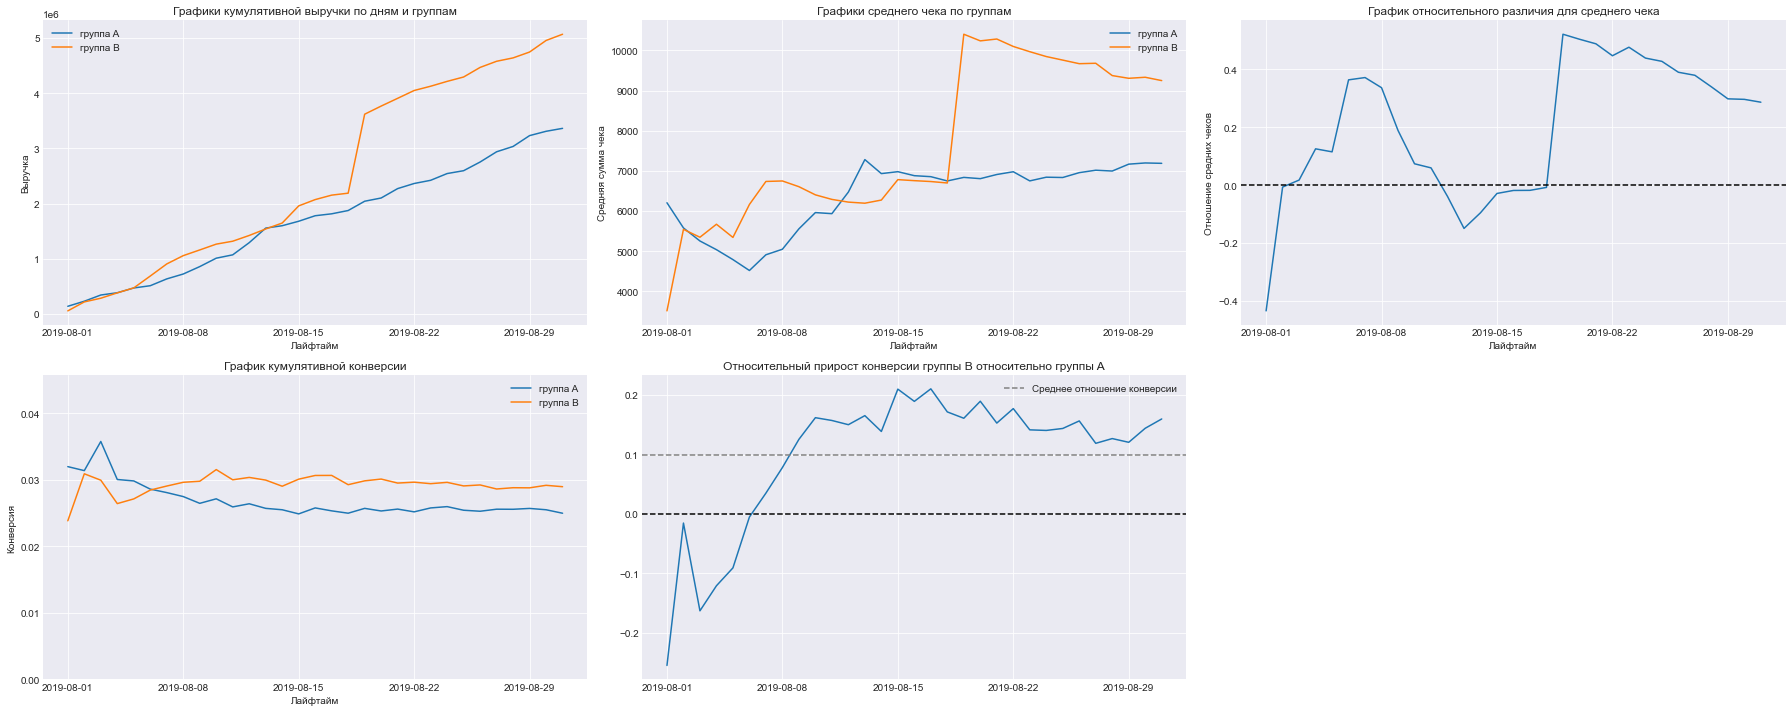

In [17]:
reporter.plot_cumulative_metrics()

&#9889; **Выводы**

1. В середине третей недели кумулятивная выручка и средний чек группы В показал резкий рост, график относительного различия для среднего чека между группами также показывает значительные колебания: вероятно, на метрики оказывают влияние выбросы - крупные заказы.
2. До середины первой недели конвертация обоих групп колебалась, при лучшей конвертации группы А. К концу первой недели теста конверсии групп стабилизировались, после чего конверсия группы В показала заметный рост и на протяжении теста превышала конверсию группы А.
3. График  прироста конверсии группы В относительно группа А также демонстирирует лидерство группы В по конверсии: с конца с первой недели метрика растет, к началу второй недели взрывной рост прекратился и, несмотря на колебания, к концу теста стабилизировалась c приростом в районе 10% относительно группы А.


[В оглавление](#TOC)

## 3) Исследуем количество заказов на пользователя и стоимости заказов<a class="anchor" id="3_3"></a>

### - количество заказов на пользователя

Сформируем таблицу для анализа, выведем результат

In [ ]:
orders_by_users = reporter.orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False)

Минимальное число заказов, ожидаемо, 1, максимальное количество заказов - 11. Посмтроим графики.

### - визуализируем количество заказов на пользователя

In [ ]:
reporter.plotter(orders_by_users, 'orders', 'Количество заказов')

Принимая во внимание, как разнесены среднее и медиана на гистограмме - выбросы оказывают сильное влияние. Девяносто девять процентов пользоватлей заказало от 1 до 4 раз. Это же подтверждает и диаграмма рассеивания - несколько крупных точек доминируют над графиком - и диаграмма размаха - ящик вытянулся в линию. Визуально - выбросов не так много. Проверим числовые значения.

### - получим базовую статистику о количестве заказов на пользователя

In [ ]:
orders_by_users[['orders']].describe(percentiles=[.25, .5, .75, .95, .99]).T

Всего пять процентов пользователей заказывают более двух раз (95-й перцентиль), и всего более процента - более 4 (99-й перцентиль).

&#9889; **Выводы**

1. В заказах есть выбросы, которые влияют на среднее.
2. Минимальное число заказов -1 , максимальное число заказов - 11.
3. Принимая во внимание имеющиеся данные - разумно выбрать 2 заказа на одного пользователя за верхню границу числа заказов.

[В оглавление](#TOC)

### - визуализируем стоимости заказов

In [ ]:
reporter.plotter(reporter.orders, 'revenue', 'Выручка')

В данных о выручке есть сверхдорогой заказ, который хорошо виден на диаграмме рассеивания и диаграмме размаха. Выброс оказывает сильное влияние на среднее. В целом, визуально выбросов немного. Проверим числовые значения.

### - получим базовую статистику о стоиомости заказов

In [ ]:
reporter.orders[['revenue']].describe(percentiles=[.25, .5, .75, .95, .99]).T

Почти все пользователи уложились в диапазон стоимости заказов от 50 до 58 233 рублей, со средним - 8 348 рублей. Девяносто пять процентов всех пользоватлей уложились в диапазон от 50 до 28 000 рублей (95-й перцентиль). Один процент заказал на сумму свыше 58 233 рублей (99-й перцентиль), кто-то заказал на 1 294 500 рублей. Избавимся от заказов дороже 28000 (95-й перцентиль) и снова построим графики.

In [ ]:
reporter.plotter(reporter.orders.query('revenue < 28001'), 'revenue', 'Выручка')

Среднее и медиана все еще заметно разнесены, но диаграмма рассеивания и размаха показывают куда более равномерное распределение стоимости заказов. Учитывая, что данных не слишком много - дальнейшее сокращение выборки окажет негативное влияние на возможность сделать вывод.

&#9889; **Выводы**

1. В выручке есть выбросы, которые влияют на среднее. Выбросов немного.
2. Минимальная сумма заказа - 50 рублей , максимальная 1 294 500 рублей.
3. Принимая во внимание имеющиеся данные - разумно выбрать 28 000 рублей (95-й перцентиль) за верхню границу стоимости заказа.

[В оглавление](#TOC)

## 4) Проведем статистические тесты<a class="anchor" id="3_4"></a>

1. Тест будет проведен по полным и сокращенным данным (без выбросов).
<br></br>    
2. Перед проведением тестов из полных данных исключены выбросы:
     - из выборок о заказах верхняя граница установлена на 95-ом перцентиле (2 заказа), 
     - из выборок о выручке верхняя граница установлена на 95-ом перцентиле (28 000 рублей).
<br></br>        
3. К полученным выборкам будет применен статистический критерий Манна-Уитни.
<br></br>    
4. Для полных и сокращенных данных конверсии проверим гипотезу "Конверсии группы А и В одинаковые":
     - нулевую гипотезу, которую проверяет тест, сформулируем так: "В конверсии между группами нет различий",
     - альтернативную гипотезу, соответственно, сформулируем так: "В конверсии между группами есть различия",
     - примем уровень значимости в 5%.
<br></br>     
4. Для полных и сокращенных данных среднего чека проверим гипотезу "Средние чеки группы А и В одинаковые":
     - нулевую гипотезу, которую проверяет тест, сформулируем так: "Отличий в среднем чеке между группами нет",
     - альтернативную гипотезу, соответственно, сформулируем так: "Отличия в среднем чеке между группами есть",
     - примем уровень значимости в 5%.     

In [ ]:
tests_result = MannWhitneyU(reporter.visitors, reporter.orders, cumulated).mannwhitneyu()
(tests_result.style
             .set_properties(**{'text-align': 'left'})
             .set_table_styles([{'selector': 'th',
                                 'props': [('text-align','left')]}])
             .format({'alpha': "{:.2f}", 'p-value < alpha': bool}))

&#9889; **Выводы**


1. В отношении различий конверсии между группами А и В (и по полным, и по очищенным от аномалий выборкам), исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы: конверсии групп В и А имеют статистически значимые различия.
2. В отношении разности среднего чека между группами А и В (и по полным, и по очищенным от аномалий выборкам), исходя из представленных данных, на уровне значимости 5% - нет оснований отвергнуть нулевую гипотезу в пользу альтернативы: нет статистически значимого различия по среднему чеку между группами.

[В оглавление](#TOC)

## Выводы по итогам анализ А/В-теста<a class="anchor" id="3_conclusion"></a>

1. Есть статистически значимое различие по конверсии между группами как по полным, сырым, данным, так и после фильтрации аномалий.
2. По полным, сырым, данным и после фильтрации аномалий нет статистически значимого различия по среднему чеку между группами. 
3. Из график различия конверсии между группами следует, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения. График различия среднего чека колеблется, сделать из этого графика определённые выводы нельзя.
5. На основании представленных данных, рекомендовано остановить тест, признать его успешным и перейти к проверке следующей гипотезы.

# Чек-лист<a class='anchor' id='checklist'></a>

Часть 1. Приоритизация гипотез.
- [X] Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [X] Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [X] Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста
- [x] Постройте график кумулятивной выручки по группам.
- [x] Постройте график кумулятивного среднего чека по группам.
- [x] Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.
- [x] Постройте график кумулятивной конверсии по группам.
- [x] Постройте график относительного изменения кумулятивной конверсии группы B к группе A.
- [x] Сделайте выводы и предположения.
<br></br>
- [x] Постройте точечный график количества заказов по пользователям.
- [x] Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.
- [x] Выберите границу для определения аномальных пользователей.
- [x] Постройте точечный график стоимостей заказов.
- [x] Посчитайте 95-й и 99-й перцентили стоимости заказов.
- [x] Выберите границу для определения аномальных заказов.
- [x] Сделайте выводы и предположения.
<br></br>
- [x] Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- [x] Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
- [x] Сделайте выводы и предположения.
<br></br>
- [x] Примите решение по результатам теста и объясните его.

[В оглавление](#TOC)